In [23]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import hvplot
import hvplot.pandas
from IPython.display import Markdown

pd.set_option("display.max_rows", 2000)
pd.set_option("display.max_columns", 2000)
pd.set_option("display.width", 1000)

In [24]:
# Set the file path
filepath = Path("btcprices.csv")

# Read the CSV located at the file path into a Pandas DataFrame
btc_df = pd.read_csv(filepath, parse_dates=True, infer_datetime_format=True)

# Print the DataFrame
btc_df.head()

,symbol,date,close,volume
0,BTC/USD,2019-01-28,3431.0,4223.886542
1,BTC/USD,2019-01-29,3395.0,3060.276564
2,BTC/USD,2019-01-30,3436.9,2130.910940
3,BTC/USD,2019-01-31,3409.6,2200.635489
4,BTC/USD,2019-02-01,3437.2,2824.678878


In [25]:
# Drop NAs and calculate daily percent return
btc_df['daily_return'] = btc_df['close'].dropna().pct_change()
btc_df.head()

,symbol,date,close,volume,daily_return
0,BTC/USD,2019-01-28,3431.0,4223.886542,NaN
1,BTC/USD,2019-01-29,3395.0,3060.276564,-0.010493
2,BTC/USD,2019-01-30,3436.9,2130.910940,0.012342
3,BTC/USD,2019-01-31,3409.6,2200.635489,-0.007943
4,BTC/USD,2019-02-01,3437.2,2824.678878,0.008095


In [26]:
 # Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
btc_df['fast_close'] = btc_df['close'].ewm(halflife=short_window).mean()
btc_df['slow_close'] = btc_df['close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
btc_df['crossover_long'] = np.where(btc_df['fast_close'] > btc_df['slow_close'], 1.0, 0.0)
btc_df['crossover_short'] = np.where(btc_df['fast_close'] < btc_df['slow_close'], -1.0, 0.0)
btc_df['crossover_signal'] = btc_df['crossover_long'] + btc_df['crossover_short']

btc_df.head()

,symbol,date,close,volume,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
0,BTC/USD,2019-01-28,3431.0,4223.886542,NaN,3431.000000,3431.000000,0.0,0.0,0.0
1,BTC/USD,2019-01-29,3395.0,3060.276564,-0.010493,3407.000000,3412.376417,0.0,-1.0,-1.0
2,BTC/USD,2019-01-30,3436.9,2130.910940,0.012342,3424.085714,3421.123645,1.0,0.0,1.0
3,BTC/USD,2019-01-31,3409.6,2200.635489,-0.007943,3416.360000,3417.936651,0.0,-1.0,-1.0
4,BTC/USD,2019-02-01,3437.2,2824.678878,0.008095,3427.116129,3422.341017,1.0,0.0,1.0


<AxesSubplot:>

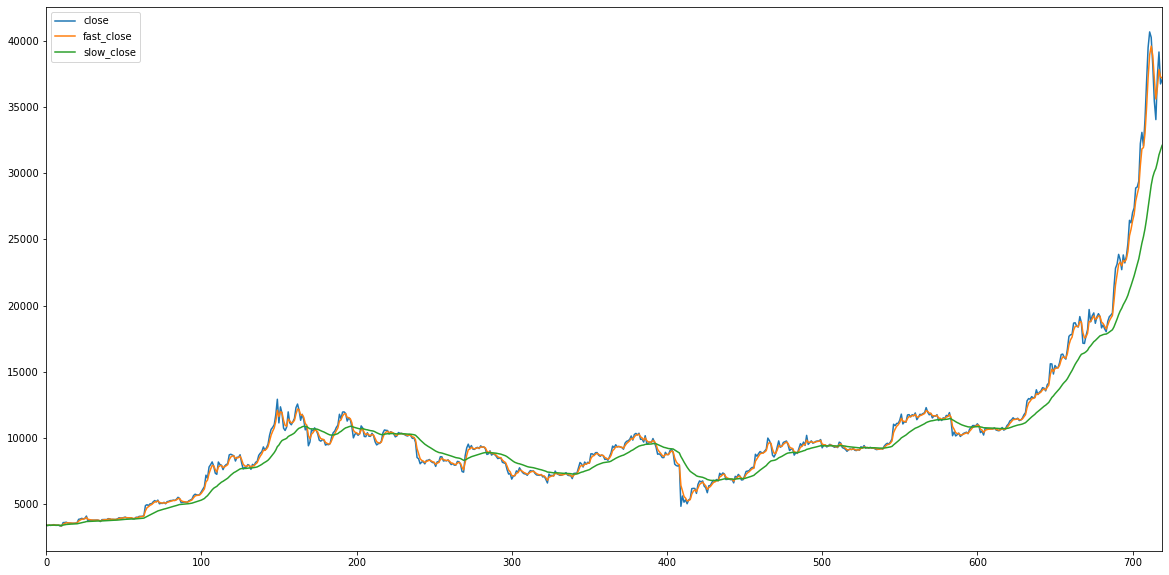

In [27]:
# Plot the EMA of BTC/USD closing prices
btc_df[['close', 'fast_close', 'slow_close']].plot(figsize=(20,10)) 

In [28]:
# Convert DataFrame to CSV
btc_df.to_csv(r"btc_ema.csv", index = False)

## Ethereum

In [29]:
# Set the file path
filepath = Path("ethprices.csv")

# Read the CSV located at the file path into a Pandas DataFrame
eth_df = pd.read_csv(filepath, parse_dates=True, infer_datetime_format=True)

# Print the DataFrame
eth_df.head()

,symbol,date,close,volume
0,ETH/USD,2019-01-28,105.43,116919.953476
1,ETH/USD,2019-01-29,104.01,58259.806501
2,ETH/USD,2019-01-30,107.50,80182.639900
3,ETH/USD,2019-01-31,105.74,67713.537526
4,ETH/USD,2019-02-01,105.69,80417.732063


In [30]:
# Drop NAs and calculate daily percent return
eth_df['daily_return'] = eth_df['close'].dropna().pct_change()
eth_df.head()

,symbol,date,close,volume,daily_return
0,ETH/USD,2019-01-28,105.43,116919.953476,NaN
1,ETH/USD,2019-01-29,104.01,58259.806501,-0.013469
2,ETH/USD,2019-01-30,107.50,80182.639900,0.033554
3,ETH/USD,2019-01-31,105.74,67713.537526,-0.016372
4,ETH/USD,2019-02-01,105.69,80417.732063,-0.000473


In [31]:
 # Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
eth_df['fast_close'] = eth_df['close'].ewm(halflife=short_window).mean()
eth_df['slow_close'] = eth_df['close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
eth_df['crossover_long'] = np.where(eth_df['fast_close'] > eth_df['slow_close'], 1.0, 0.0)
eth_df['crossover_short'] = np.where(eth_df['fast_close'] < eth_df['slow_close'], -1.0, 0.0)
eth_df['crossover_signal'] = eth_df['crossover_long'] + eth_df['crossover_short']

eth_df.head()

,symbol,date,close,volume,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
0,ETH/USD,2019-01-28,105.43,116919.953476,NaN,105.430000,105.430000,0.0,0.0,0.0
1,ETH/USD,2019-01-29,104.01,58259.806501,-0.013469,104.483333,104.695403,0.0,-1.0,-1.0
2,ETH/USD,2019-01-30,107.50,80182.639900,0.033554,106.207143,105.695765,1.0,0.0,1.0
3,ETH/USD,2019-01-31,105.74,67713.537526,-0.016372,105.958000,105.707998,1.0,0.0,1.0
4,ETH/USD,2019-02-01,105.69,80417.732063,-0.000473,105.819677,105.703883,1.0,0.0,1.0


<AxesSubplot:>

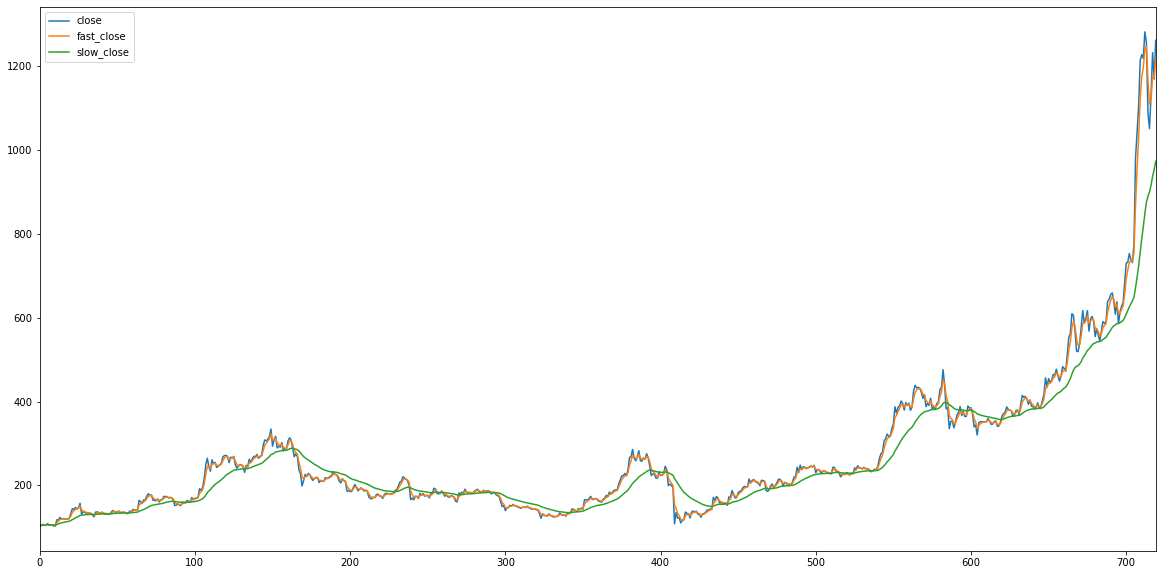

In [32]:
# Plot the EMA of ETH/USD closing prices
eth_df[['close', 'fast_close', 'slow_close']].plot(figsize=(20,10)) 

In [33]:
# Convert DataFrame to CSV
eth_df.to_csv(r"eth_ema.csv", index = False)

## Litecoin

In [34]:
# Set the file path
filepath = Path("ltcprices.csv")

# Read the CSV located at the file path into a Pandas DataFrame
ltc_df = pd.read_csv(filepath, parse_dates=True, infer_datetime_format=True)

# Print the DataFrame
ltc_df.head()

,symbol,date,close,volume
0,LTC/USD,2019-01-28,30.88,5079.953753
1,LTC/USD,2019-01-29,30.67,2233.563972
2,LTC/USD,2019-01-30,31.59,2372.267243
3,LTC/USD,2019-01-31,31.17,5511.537932
4,LTC/USD,2019-02-01,32.43,5922.005102


In [35]:
# Drop NAs and calculate daily percent return
ltc_df['daily_return'] = ltc_df['close'].dropna().pct_change()
ltc_df.head()

,symbol,date,close,volume,daily_return
0,LTC/USD,2019-01-28,30.88,5079.953753,NaN
1,LTC/USD,2019-01-29,30.67,2233.563972,-0.006801
2,LTC/USD,2019-01-30,31.59,2372.267243,0.029997
3,LTC/USD,2019-01-31,31.17,5511.537932,-0.013295
4,LTC/USD,2019-02-01,32.43,5922.005102,0.040423


In [36]:
 # Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
ltc_df['fast_close'] = ltc_df['close'].ewm(halflife=short_window).mean()
ltc_df['slow_close'] = ltc_df['close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
ltc_df['crossover_long'] = np.where(ltc_df['fast_close'] > ltc_df['slow_close'], 1.0, 0.0)
ltc_df['crossover_short'] = np.where(ltc_df['fast_close'] < ltc_df['slow_close'], -1.0, 0.0)
ltc_df['crossover_signal'] = ltc_df['crossover_long'] + ltc_df['crossover_short']

ltc_df.head()

,symbol,date,close,volume,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
0,LTC/USD,2019-01-28,30.88,5079.953753,NaN,30.880000,30.880000,0.0,0.0,0.0
1,LTC/USD,2019-01-29,30.67,2233.563972,-0.006801,30.740000,30.771362,0.0,-1.0,-1.0
2,LTC/USD,2019-01-30,31.59,2372.267243,0.029997,31.225714,31.063359,1.0,0.0,1.0
3,LTC/USD,2019-01-31,31.17,5511.537932,-0.013295,31.196000,31.092852,1.0,0.0,1.0
4,LTC/USD,2019-02-01,32.43,5922.005102,0.040423,31.832903,31.398577,1.0,0.0,1.0


<AxesSubplot:>

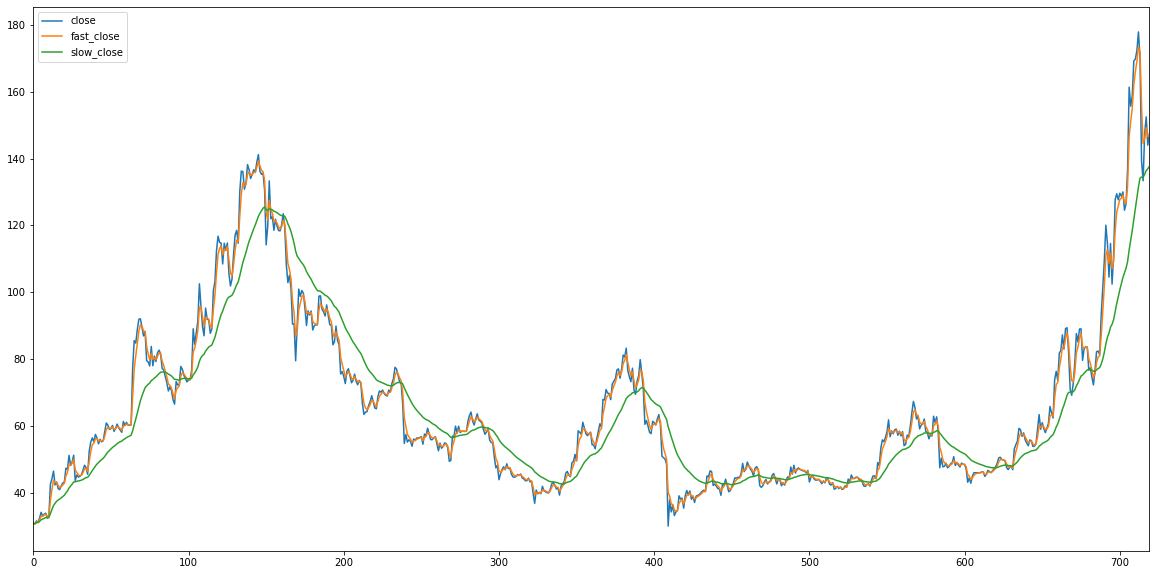

In [37]:
# Plot the EMA of LTC/USD closing prices
ltc_df[['close', 'fast_close', 'slow_close']].plot(figsize=(20,10)) 

In [38]:
# Convert DataFrame to CSV
ltc_df.to_csv(r"ltc_ema.csv", index = False)

## Dash

In [39]:
# Set the file path
filepath = Path("dashprices.csv")

# Read the CSV located at the file path into a Pandas DataFrame
dash_df = pd.read_csv(filepath, parse_dates=True, infer_datetime_format=True)

# Print the DataFrame
dash_df.head()

,symbol,date,close,volume
0,DASH/USD,2019-01-28,66.680,623.716675
1,DASH/USD,2019-01-29,66.349,155.367860
2,DASH/USD,2019-01-30,68.170,242.900718
3,DASH/USD,2019-01-31,66.550,1579.959112
4,DASH/USD,2019-02-01,66.665,609.739983


In [40]:
# Drop NAs and calculate daily percent return
dash_df['daily_return'] = dash_df['close'].dropna().pct_change()
dash_df.head()

,symbol,date,close,volume,daily_return
0,DASH/USD,2019-01-28,66.680,623.716675,NaN
1,DASH/USD,2019-01-29,66.349,155.367860,-0.004964
2,DASH/USD,2019-01-30,68.170,242.900718,0.027446
3,DASH/USD,2019-01-31,66.550,1579.959112,-0.023764
4,DASH/USD,2019-02-01,66.665,609.739983,0.001728


In [41]:
 # Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
dash_df['fast_close'] = dash_df['close'].ewm(halflife=short_window).mean()
dash_df['slow_close'] = dash_df['close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
dash_df['crossover_long'] = np.where(dash_df['fast_close'] > dash_df['slow_close'], 1.0, 0.0)
dash_df['crossover_short'] = np.where(dash_df['fast_close'] < dash_df['slow_close'], -1.0, 0.0)
dash_df['crossover_signal'] = dash_df['crossover_long'] + dash_df['crossover_short']

dash_df.head()

,symbol,date,close,volume,daily_return,fast_close,slow_close,crossover_long,crossover_short,crossover_signal
0,DASH/USD,2019-01-28,66.680,623.716675,NaN,66.680000,66.680000,0.0,0.0,0.0
1,DASH/USD,2019-01-29,66.349,155.367860,-0.004964,66.459333,66.508767,0.0,-1.0,-1.0
2,DASH/USD,2019-01-30,68.170,242.900718,0.027446,67.436857,67.101306,1.0,0.0,1.0
3,DASH/USD,2019-01-31,66.550,1579.959112,-0.023764,66.963867,66.948836,1.0,0.0,1.0
4,DASH/USD,2019-02-01,66.665,609.739983,0.001728,66.809613,66.883940,0.0,-1.0,-1.0


<AxesSubplot:>

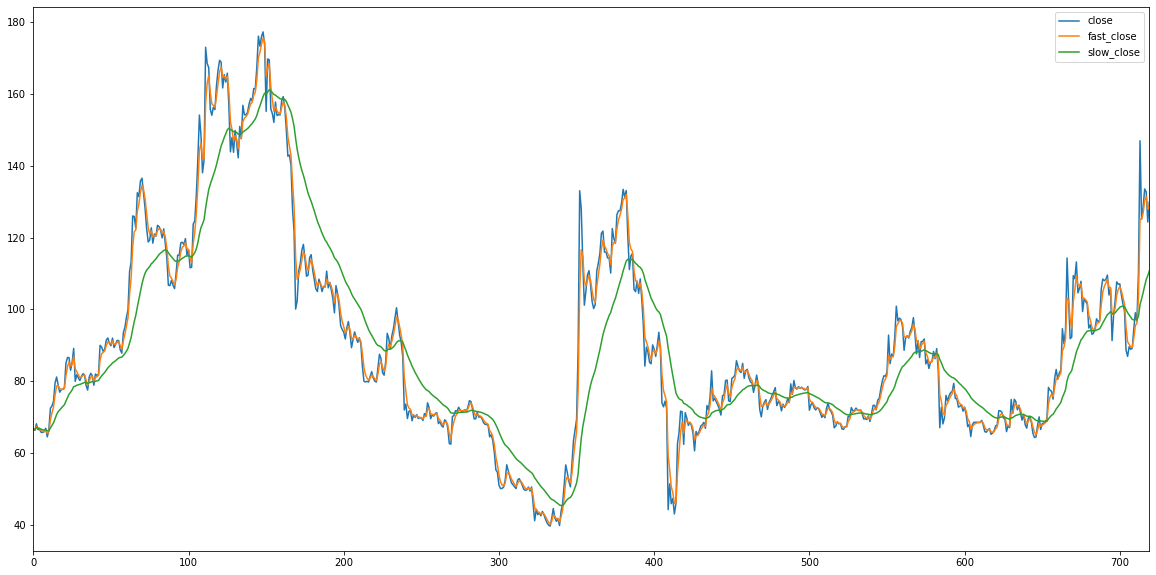

In [43]:
# Plot the EMA of DASH/USD closing prices
dash_df[['close', 'fast_close', 'slow_close']].plot(figsize=(20,10)) 

In [44]:
# Convert DataFrame to CSV
dash_df.to_csv(r"dash_ema.csv", index = False)